In [1]:
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt
import h5py
import math
import os

In [2]:
def vizualise_spikes(spikes , samplingtime , data):
    a = np.zeros(data.shape)    
    for i in spikes[0][:]:
        index = int((i / samplingtime))
        if index > data.shape[1]:
            return a
        else :    
            a[0][index] = data[0][index]
    return a

def find_largest(limit , spikes):
    previous = 0
    for i in spikes[0][:]:
        previous = previous + 1
        if i > limit: 
            return int(previous)

def binary_string(number,num_bits=10):
    if(number<0):
        temp = 2**(num_bits-1)+number
        temp_bin = bin(temp)
        temp_bin = temp_bin[2:]
        temp_bin = '1'+ temp_bin.zfill(num_bits-1)
        return temp_bin
    else:
        temp_bin = bin(number)
        temp_bin = temp_bin[2:]
        return temp_bin.rjust(num_bits,'0')
        

27


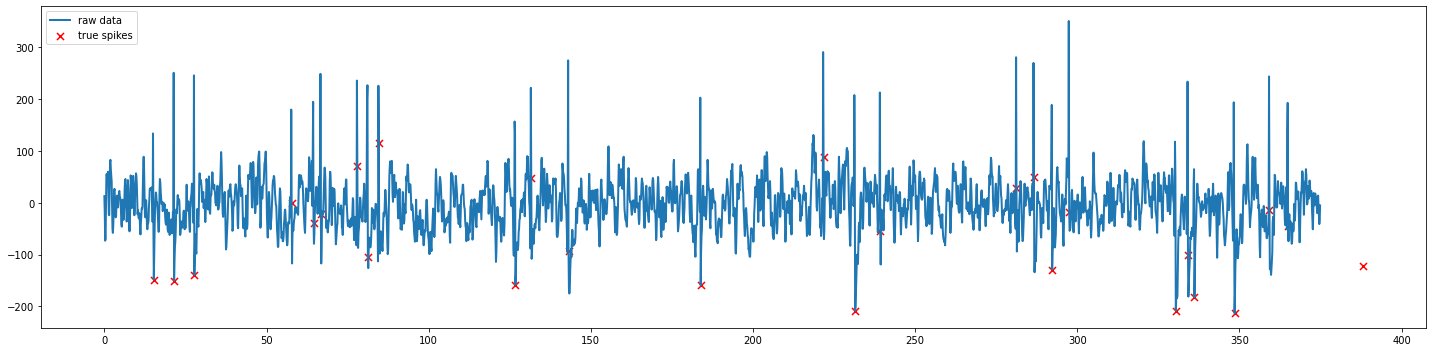

<class 'int'>
486
-343


In [3]:
test_folder = 'raw_data/'
test_file = "C_Difficult1_noise015"
test_file_type = '.h5'

# reading the data
test_filename = test_folder + test_file + test_file_type
with h5py.File(test_filename,'r') as read_test_file:
    data = read_test_file['data'][()] # the raw waveform
    sampling_rate = read_test_file['samplingIntervar'][()]
    spikes = read_test_file['spike_times'][()] # the spike time points

spikes = np.transpose(spikes)
spikes = spikes + 25
data = np.transpose(data)
sampling_rate = sampling_rate[0][0]
# uncomment the next few lines if downsampling is required
downsampled = []
for i in range(0,data.shape[1],3):
    downsampled.append(data[0][i])
sampling_rate = sampling_rate*3
data = np.array(downsampled,ndmin=2)
spikes = spikes/3
spikes = np.round(spikes , 0)
data = data * 256
data = np.round(data,0)
data = data.astype(int)
spikes_int = spikes.astype(int)
time = np.linspace(0,sampling_rate*data.shape[1], num=data.shape[1])
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
limit  = 3000
ax.plot(time[0:limit],data[0][0:limit],linewidth=2.0 , label = 'raw data')
largest_spike_index = find_largest(limit, spikes)
print(largest_spike_index)
ax.scatter(time[(spikes_int[0][0:largest_spike_index])],data[0][(spikes_int[0][0:largest_spike_index])], s=50, c='r', marker='x' , label = 'true spikes')
plt.legend(loc = 'upper left')
fig.tight_layout()
plt.show()
data = data[0][:]
data_size = data.shape
data_size = data_size[0]
print(type(data_size))
print(np.amax(data))
print(np.amin(data))

In [15]:
#create input file
num_samples = 64
num_channels = 96
with open('spikes.mem','w') as f:
    for i in range(0,(num_samples)):
        data_string = binary_string(data[i])
        f.write(num_channels*data_string)
        if i!= num_samples-1:
            f.write('\n')

In [5]:
#ED OUT
num_samples = 30
num_channels = 96
with open('ed.mem','w') as f:
    for i in range(0,30):
        data_string = binary_string((data[i]*data[i]),20)
        f.write(num_channels*data_string)
        if i!= 29:
            f.write('\n')

In [6]:
#aso OUT
num_samples = 30
num_channels = 96
with open('aso.txt','w') as f:
    string_fill =binary_string((data[i]*data[i]),20)
    f.write(string_fill)
    f.write('\n')
    for i in range(1,30):
        data_string = binary_string(abs(data[i]*(data[i]-data[i-1])),20)
        f.write(num_channels*data_string)
        if i!= 29:
            f.write('\n')